Hey there, hi there, ho there, dear reader! 
Today we will be implementing yet another classification model from Andrew Ng's Machine Learning course (https://www.coursera.org/learn/machine-learning), the support vector machine (SVM). SVMs can be used to create both linear and non-linear decision boundaries for our data. In the non-linear case, we will have to use the kernel trick, which is simply creating a function that remaps our data so that it can then be linearly separable. We will focus on the 2-dimensional case and draw a lot of pictures to get intuition, however, the SVM works just as well for higher dimensional problems, as we will show when we use SVMs to do email spam classification.

Let’s get started by importing our favorite data science libraries!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline
#set default figure size
mpl.rcParams['figure.figsize'] = (12, 8)

Let's load up the first data set which is linearly separable.

In [29]:
data1 = loadmat('data/ex6data1.mat')
data1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [30]:
y1 = data1['y']
X1 = data1['X']

print('X1:', X1.shape)
print('y1:', y1.shape)

X1: (51, 2)
y1: (51, 1)


When possible, it's always good to write up a function to visualize your data. This is useful because we first of all want to be able to see what the data looks like and we want to reuse the function later whenever we can.

In [31]:
def plotData(X, y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos, 0], X[pos, 1], s = 50, c = 'k', marker = '+', linewidths = 1, label = 'Positive')
    plt.scatter(X[neg, 0], X[neg, 1], s = 50, c = 'y', marker= 'o', linewidths = 1, label = 'Negative')
    plt.legend()

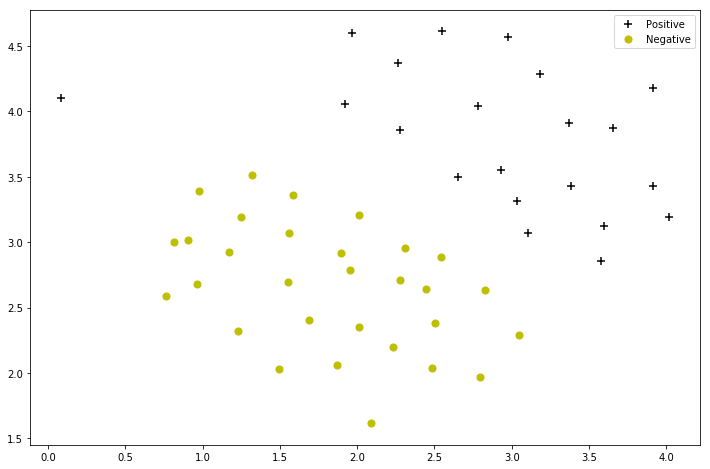

In [32]:
plotData(X1, y1)

Looks pretty simple, except keep your eye on that outlier in the upper left corner.

Now, the in-class explanation is little lacking in the technical information but what we want to do is minimize a cost/loss function, just like always. To this end, let us create the following composite function _f_: 
\begin{equation} f(g(w)) \end{equation}


where
\begin{equation} f(z)=\max(0,1-y\ z) \end{equation}
and 

\begin{equation} g(w)=\mathbf{x}\cdot \mathbf{w} \end{equation} 

We then need to take the partial derivative of our function in order to set the values of w such that we create the best possible hyperplane to separate our data classes. Via the chain rule we obtain:

\begin{equation} \frac{\partial}{\partial w_i} f(g(w))=\frac{\partial f}{\partial z} \frac{\partial g}{\partial w_i} \end{equation}

\begin{equation}\frac{\partial f(g(w))}{\partial w_i} =
\begin{cases}      
-y\ x_i &\text{if } y\ \mathbf{x}\cdot \mathbf{w} < 1 \\
0&\text{if } y\ \mathbf{x}\cdot \mathbf{w} > 1      
\end{cases}\end{equation}


The gradient is then the sum of all of our derivatives.

\begin{equation}
\frac{\partial{f(g(w))}}{\partial{w}}=\sum_i{\frac{\partial{f(g(w))}}{\partial w}}
\end{equation}

Our composite function is known as the Hinge Loss and looks like this:

Text(0.5,1,'Hinge Loss if y = 1')

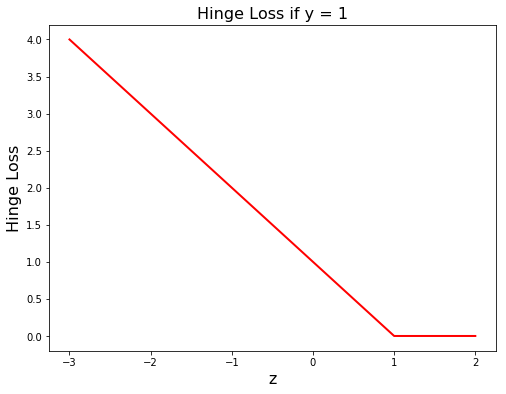

In [103]:
digits = np.arange(-3, 3, step=1)
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.plot(digits, np.where(digits < 1, 1 - digits, 0), color='red', lw = 2)
plt.xlabel('z',fontsize=16)
plt.ylabel('Hinge Loss',fontsize=16)
plt.title('Hinge Loss if y = 1',fontsize=16)

Text(0.5,1,'Hinge Loss if y = 0')

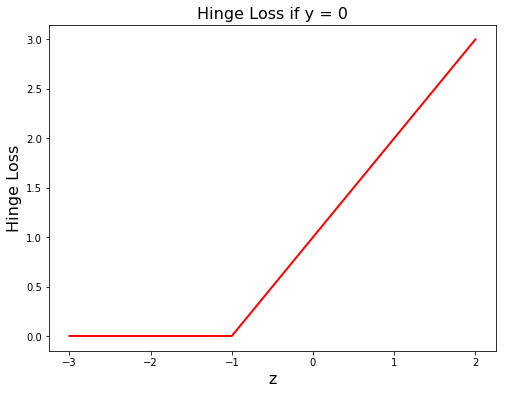

In [104]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.plot(digits, np.where(digits > -1, 1 + digits, 0), color='red', lw = 2)
plt.xlabel('z',fontsize=16)
plt.ylabel('Hinge Loss', fontsize=16)
plt.title('Hinge Loss if y = 0',fontsize=16)

Lucky for us Andrew Ng says we're allowed to the use libraries in this excercise rather than coding the whole SVM from scratch, so let's use scikit learn with a linear kernal first! 

In [105]:
from sklearn.svm import SVC

In [106]:
clf1 = SVC(C = 1.0, kernel = 'linear')
clf1.fit(X1, y1.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [107]:
clf1.score(X1, y1) *100

98.0392156862745

In [108]:
clf2 = SVC(C = 100, kernel = 'linear')
clf2.fit(X1, y1.ravel())
clf2.score(X1, y1) * 100

100.0

Here, C is working as a regularization parameter. A large C will mean we have lower bias and higher variance (overfitting), while a small C means higher bias and low variance (underfitting). This is makes sense as a C value of 1 did worse than a C value of 100.

Let's write up a plotting function so we can see our SVMs in action.

In [109]:
def plotSVC(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.2)

    plotData(X, y)
   
    # stars denote the support vectors which create the decision boundary
    sv = svc.support_vectors_
    
    plt.scatter(sv[:, 0], sv[:, 1], c = 'k', marker = '*', s = 100, linewidths = '1')
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    print('Number of support vectors: ', svc.support_.size)

Number of support vectors:  12


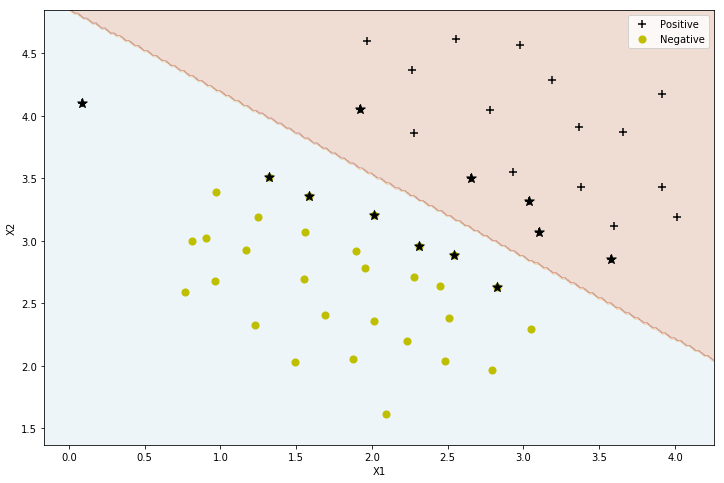

In [110]:
plotSVC(clf1, X1, y1)

Number of support vectors:  3


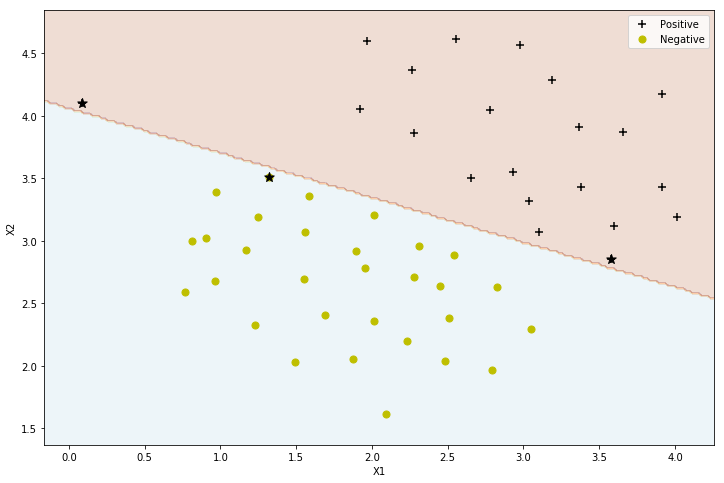

In [111]:
plotSVC(clf2, X1, y1)

The stars in the above graphs denote our support vectors, that is, the data points that helped maximize the margin between our two classes and created the decision boundary. Notice that when C was low, we needed more support vectors and we were unable to correctly classify the outlier in the upper left corner. However, after cranking C up to 100, we succeeded, however, we are likely quite overfit. Such is life in machine learning.

We can visualize this another way:

Text(0.5,1,'Support Vector Machine (C = 1.0) Decision Confidence')

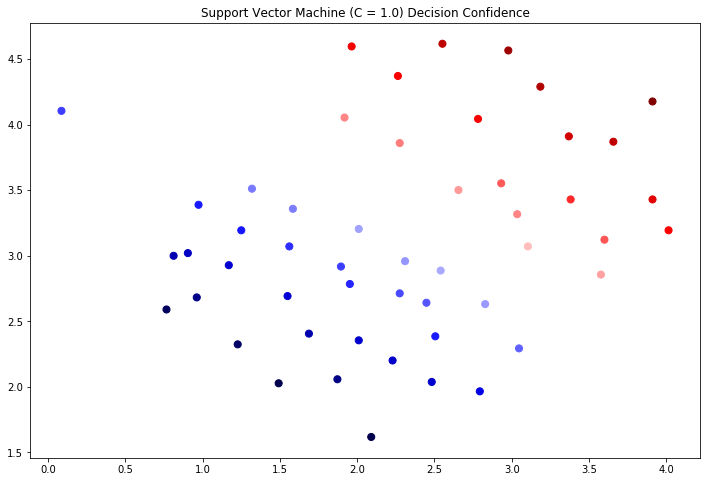

In [74]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X1[:, 0], X1[:, 1], s=50, c = clf1.decision_function(X1), cmap='seismic')
ax.set_title('Support Vector Machine (C = 1.0) Decision Confidence')

Text(0.5,1,'Support Vector Machine (C = 100) Decision Confidence')

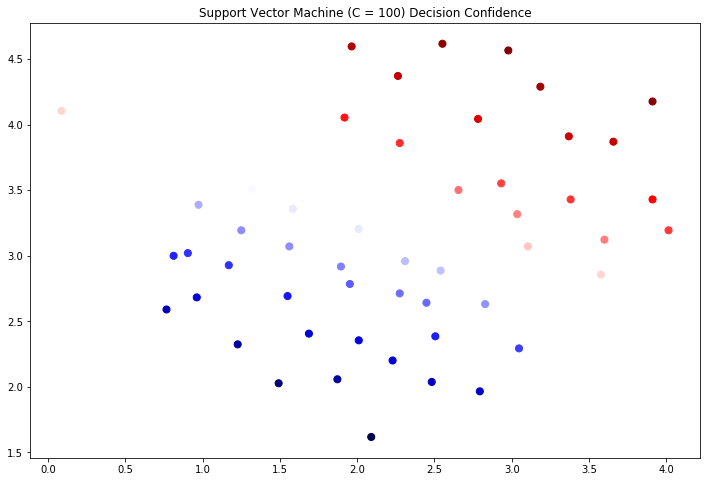

In [75]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X1[:, 0], X1[:, 1], s=50, c = clf2.decision_function(X1), cmap = 'seismic')
ax.set_title('Support Vector Machine (C = 100) Decision Confidence')

In the above graphs, the darker blues and reds indicate the relative confidence of our classifer regarding where each class belongs. When the dots are close to the decision boundary, the colors are lighter because the classifer is less sure of its decision because the data points are more similar. Additionally, once again, our outlier changes its class and color depending on which value of C we choose.

In [76]:
def gaussianKernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

In [77]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

In [78]:
data2 = loadmat('data/ex6data2.mat')

In [79]:
y2 = data2['y']
X2 = data2['X']

print('X2:', X2.shape)
print('y2:', y2.shape)

X2: (863, 2)
y2: (863, 1)


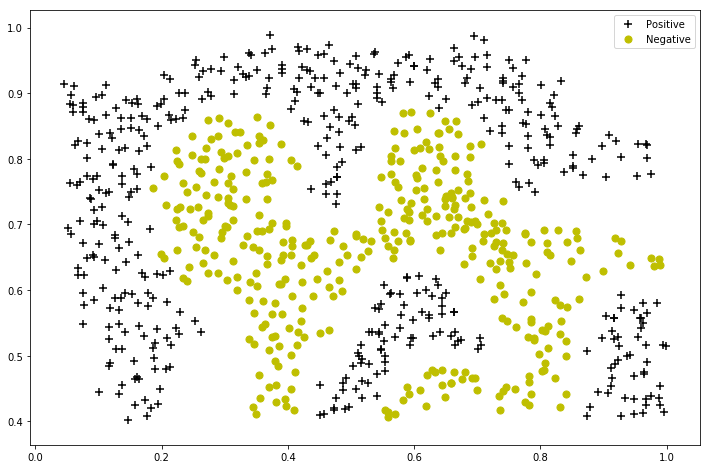

In [80]:
plotData(X2, y2)

Number of support vectors:  146


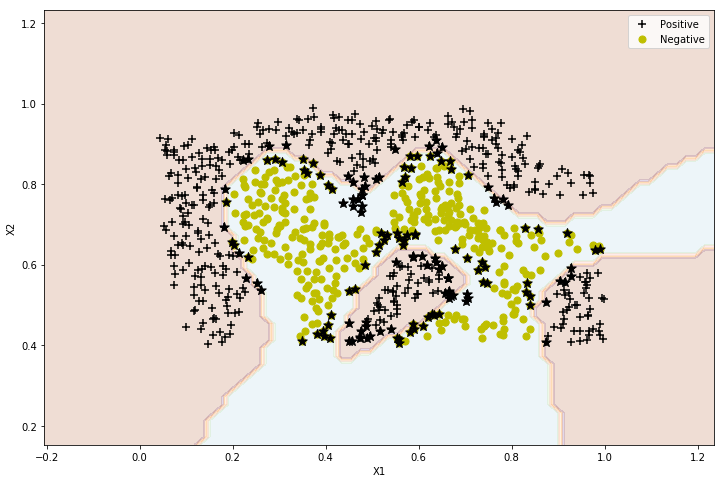

In [82]:
clf3 = SVC(C = 100, kernel = 'rbf', gamma = 10, probability = True)
clf3.fit(X2, y2.ravel())
plotSVC(clf3, X2, y2)

In [83]:
probs = clf3.predict_proba(X2)[:, 0].ravel()

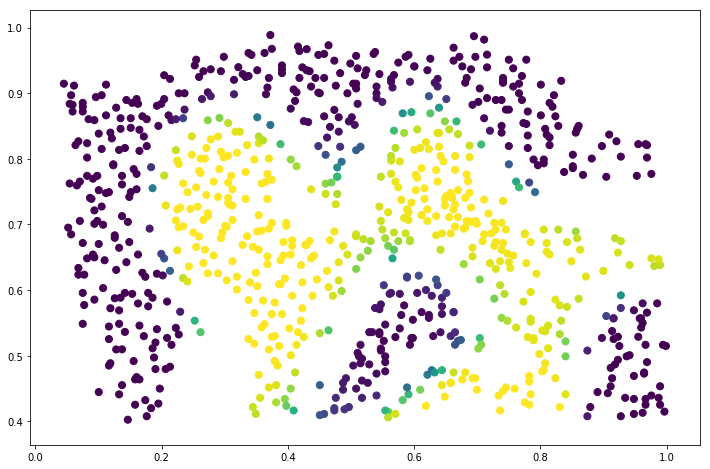

In [84]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X2[:, 0], X2[:, 1], s = 50, c = probs)

In [50]:
data3 = loadmat('data/ex6data3.mat')

y3 = data3['y']
yval = data3['yval']
X3 = data3['X']
Xval = data3['Xval']

print('X3:', X3.shape)
print('y3:', y3.shape)
print('Xval', Xval.shape)
print('yval', yval.shape)

X3: (211, 2)
y3: (211, 1)
Xval (200, 2)
yval (200, 1)


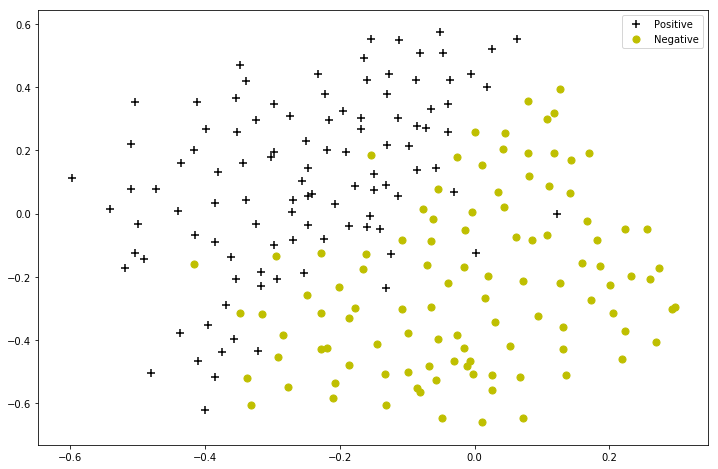

In [51]:
plotData(X3, y3)

In [53]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0; best_gamma = 0; best_C = 0

for c in C_values:
    for gamma in gamma_values:
        clf4 = SVC(C = c, gamma = gamma)
        clf4.fit(X3, y3.ravel())
        score = clf4.score(Xval, yval)
        
        if score > best_score:
            best_score = score; best_C = c; best_gamma = gamma

In [54]:
print(best_score)
print(best_C)
print(best_gamma)

0.965
0.3
100


Number of support vectors:  55


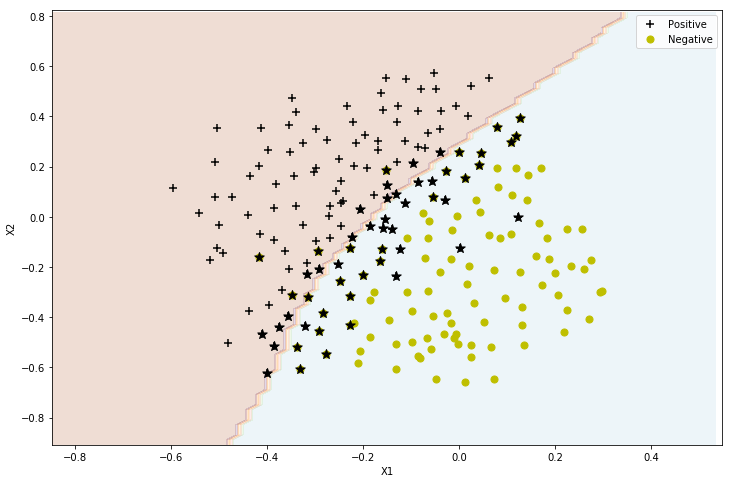

In [55]:
clf4 = SVC(C = 0.3, kernel = 'poly' , degree=3, gamma=100, probability = True)
clf4.fit(X3, y3.ravel())
plotSVC(clf4, X3, y3)

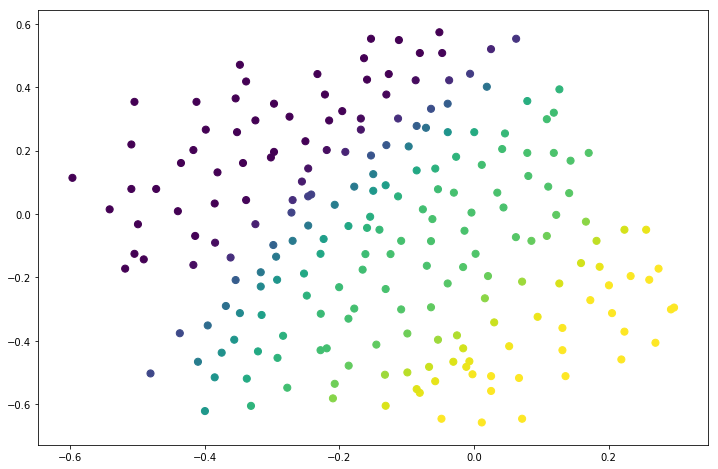

In [56]:
probs = clf4.predict_proba(X3)[:, 0].ravel()
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X3[:, 0], X3[:, 1], s = 50, c = probs)

In [57]:
data4 = pd.read_table('data/vocab.txt', header=None)
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 2 columns):
0    1899 non-null int64
1    1898 non-null object
dtypes: int64(1), object(1)
memory usage: 29.8+ KB


In [58]:
data4.head()

,0,1
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about


In [59]:
data4.tail()

,0,1
1894,1895,your
1895,1896,yourself
1896,1897,zdnet
1897,1898,zero
1898,1899,zip


In [60]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')

spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [61]:
X4 = spam_train['X']
Xtest = spam_test['Xtest']
y4 = spam_train['y']
ytest = spam_test['ytest']

In [62]:
print('X4:', X4.shape)
print('y4:', y4.shape)
print('Xtest', Xtest.shape)
print('ytest', ytest.shape)

X4: (4000, 1899)
y4: (4000, 1)
Xtest (1000, 1899)
ytest (1000, 1)


In [63]:
clf5 = SVC()
clf5.fit(X4, y4.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [64]:
print('Test accuracy = {0}%'.format(np.round(clf5.score(Xtest, ytest) * 100, 2)))

Test accuracy = 95.3%
